# Assignment problem solver
#### Laurent Lessard

In [407]:
%matplotlib inline 
import numpy as np
import pandas as pd
import scipy
from scipy.optimize import linear_sum_assignment
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [5]:
"""
Input is a m x n array of (concepts) x (colors) filled with association ratings
Output is a list of length m with the index of the color that should be associated with each concept
"""
def assignment_solve( ratings, method="balanced" ):
    m,n = ratings.shape
    assert m <= n, "More concepts than colors, assignment impossible!"
    
    # isolated merit function (only considers target in isolation)
    if method == "isolated":
        merit_matrix = ratings
    
    # balanced merit function (balances ratings of target vs off-target objects with each color)
    elif method == "balanced":
        t = 1  # this is the penalty parameter. t=1 for balanced, t=0 recovers isolated case.
        merit_matrix = np.zeros((m,n))
        for i in range(m):
            for j in range(n):
                merit_matrix[i,j] = ratings[i,j] - t*ratings[np.arange(m)!=i,j].max()
    
    # baseline merit function (uniformly bad assignment)
    elif method == "baseline":
        merit_matrix = np.zeros((m,n))
        for i in range(m):
            for j in range(n):
                merit_matrix[i,j] = -abs( ratings[i,j] - ratings[np.arange(m)!=i,j].max() )
                
    else:
        assert False, "unknown method in assignment problem"
        
    row_ind, col_ind = linear_sum_assignment( merit_matrix, maximize=True )
    return col_ind


## Examples

In [6]:
# 3 object and 5 colors
A = np.array( [[ 1, 4, 6, 2, 5 ],
               [ 2, 1, 4, 5, 7 ],
               [ 4, 2, 9, 2, 1 ]] )

In [7]:
"""
ISOLATED METHOD:
The max for each row is (6,7,9) but this can't work because the first row's 6
conflicts with the third row's 9. The best option is to pick 4 from the first
row, so the optimal sum is 4+7+9.
"""
print( assignment_solve(A, method="isolated") )

[1 4 2]


In [8]:
"""
BALANCED METHOD:
This method compares each number to the largest other number in its column and
tries to maximize this difference. The assignment 4+7+9 is problematic because
the 7 is only 2 away from the 5 above it. By picking 5 instead for the second
row, we increase this distance to 3. So the assignment is less confusable.
"""
print( assignment_solve(A, method="balanced") )

[1 3 2]


In [9]:
"""
BASELINE METHOD:
This method maximizes confusability. By picking (4,7,4) from first,second,third
rows, we get items that are all exactly +2 larger than the other choices in their
respective columns. So all items are equally likely to be mis-assigned.
"""
print( assignment_solve(A, method="baseline") )

[4 0 1]


In [10]:
print(scipy.__version__)

1.4.1


In [23]:
d = pd.read_csv('ratings_matrix.csv')
d=d.rename(columns={"Unnamed: 0": "concept"})

In [211]:
cluster_1 = ['blueberry','ocean','sky','beach']
cluster_2 = ['sunset','mango','watermelon','strawberry']
cluster_3 = ['day','noon','happy','above']
cluster_4 = ['fearful','angry','disgust','night']
cluster_5 = ['far','below','dusk','sad']

In [19]:
print( assignment_solve(ratings_matrix, method="balanced") )

[ 8 24 25 22 26 31 33  7 20 12 53 36  9 55 37 11 56 57 30 32 38 44  2  3
 50 51 46  5 23 45]


In [212]:
color_dict = pd.read_csv('color_dict.csv')
color_dict=color_dict.drop(columns='Unnamed: 0')
color_dict=color_dict.rename(columns={"index": "ind"})

In [390]:
def display_ai(d = d,concepts=cluster_1, method='isolated', title=''):
    ds = d[d.concept.isin(concepts)]
    dsa = np.array(ds.loc[:, ds.columns != 'concept'])
    soln = assignment_solve(dsa, method=method) 
    fig=plt.figure()
    rectangle1 = plt.Rectangle((10, 10), 10, 10, fc=color_dict[color_dict.ind==soln[0]+1].hex.values[0])
    rectangle2 = plt.Rectangle((22, 10), 10, 10, fc=color_dict[color_dict.ind==soln[1]+1].hex.values[0])
    rectangle3 = plt.Rectangle((34, 10), 10, 10, fc=color_dict[color_dict.ind==soln[2]+1].hex.values[0])
    rectangle4 = plt.Rectangle((46, 10), 10, 10, fc=color_dict[color_dict.ind==soln[3]+1].hex.values[0])
    plt.gca().add_patch(rectangle1)
    plt.gca().add_patch(rectangle2)
    plt.gca().add_patch(rectangle3)
    plt.gca().add_patch(rectangle4)
    plt.text(15, 25, ds.concept.iloc[0], bbox=dict(facecolor='w', alpha=0.5))
    plt.text(25, 25, ds.concept.iloc[1], bbox=dict(facecolor='w', alpha=0.5))
    plt.text(35, 25, ds.concept.iloc[2], bbox=dict(facecolor='w', alpha=0.5))
    plt.text(45, 25, ds.concept.iloc[3], bbox=dict(facecolor='w', alpha=0.5))
    if title:
        plt.title(title)
    ax = fig.add_subplot(1, 1, 1)
    ax.set_facecolor((0.8, 0.8, 0.8))
    plt.axis('scaled')
    plt.show()
    

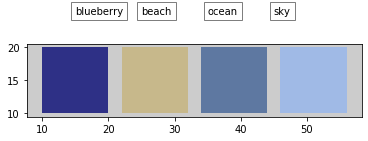

In [408]:
display_ai(d,cluster_1,'isolated')

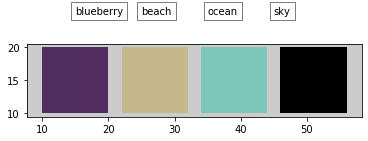

In [409]:
display_ai(d,cluster_1,'balanced')

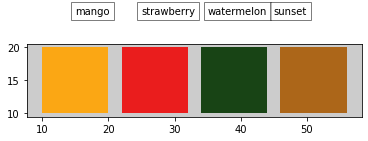

In [410]:
display_ai(d,cluster_2,'isolated')

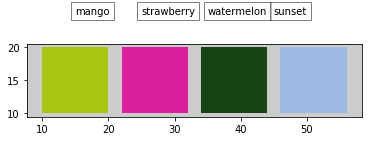

In [411]:
display_ai(d,cluster_2,'balanced')

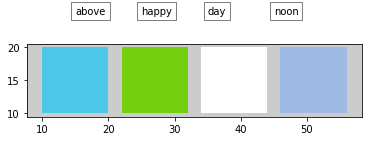

In [412]:
display_ai(d,cluster_3,'isolated')

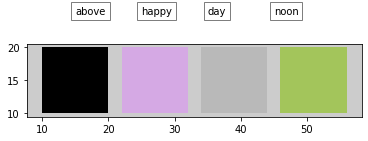

In [413]:
display_ai(d,cluster_3,'balanced')

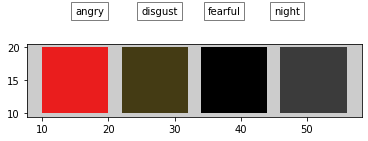

In [414]:
display_ai(d,cluster_4,'isolated')

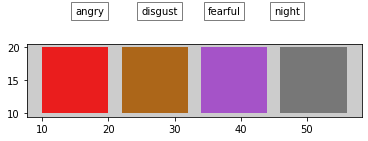

In [415]:
display_ai(d,cluster_4,'balanced')

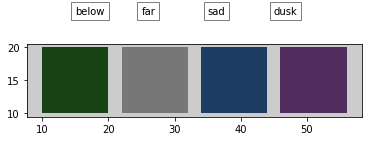

In [416]:
display_ai(d,cluster_5,'isolated')

### Reconstructing with <30 PCs

Try with one cluster

In [419]:
rmat = pd.read_csv('ratings_matrix_11PC.csv').drop(rmat.columns[[1]], axis=1).rename(columns={'Unnamed: 0':'concept'})

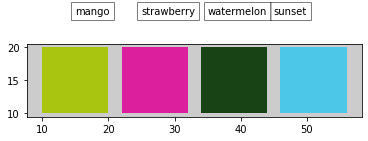

In [420]:
display_ai(d = rmat, concepts=cluster_2, method='balanced')

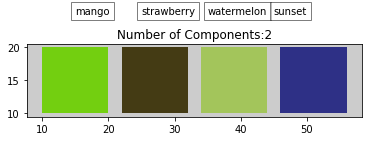

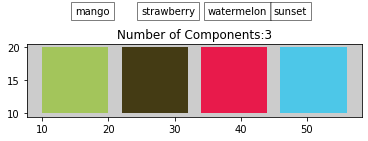

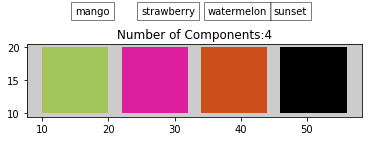

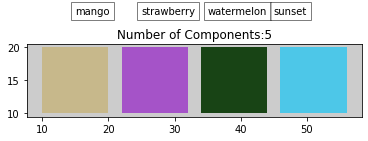

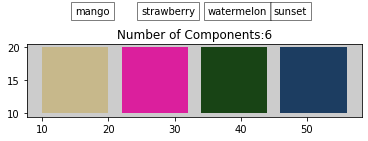

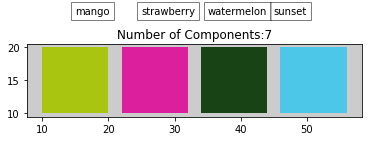

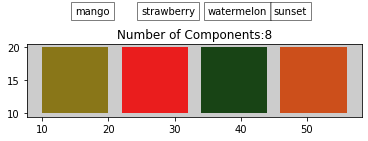

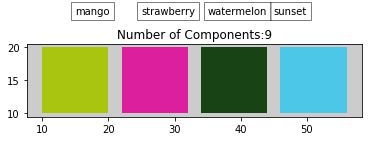

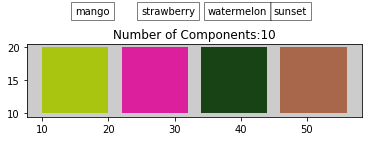

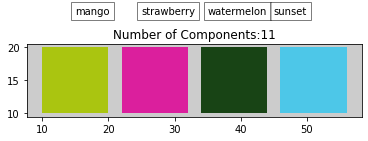

In [423]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 150em; }</style>"))


for i in range(2,12):
    rmat = rmat = pd.read_csv('ratings_matrix_{}PC.csv'.format(i)).drop(rmat.columns[[1]], axis=1).rename(columns={'Unnamed: 0':'concept'})
    
    display_ai(d = rmat, concepts=cluster_2, method='balanced',title='Number of Components:{}'.format(i))
    


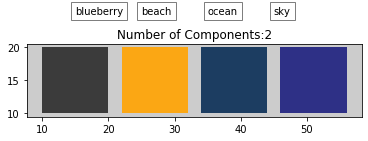

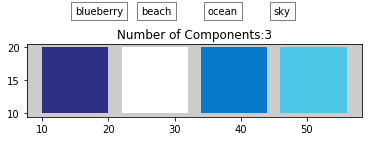

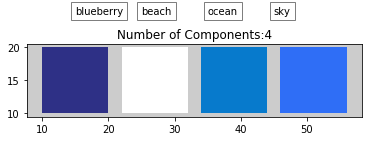

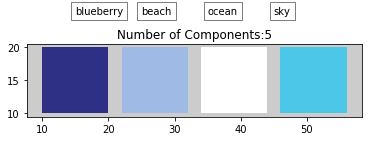

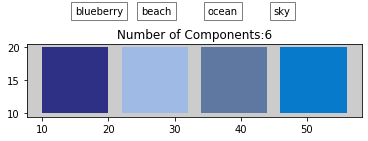

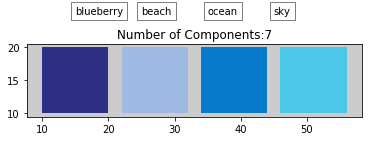

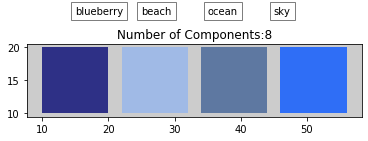

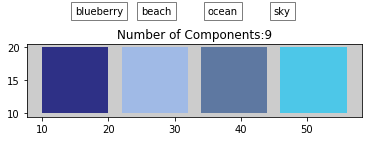

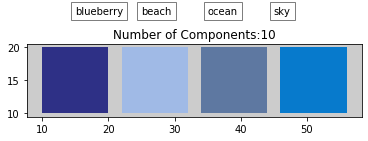

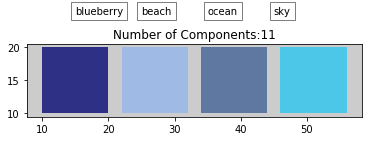

In [425]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 150em; }</style>"))


for i in range(2,12):
    rmat = rmat = pd.read_csv('ratings_matrix_{}PC.csv'.format(i)).drop(rmat.columns[[1]], axis=1).rename(columns={'Unnamed: 0':'concept'})
    
    display_ai(d = rmat, concepts=cluster_1, method='isolated',title='Number of Components:{}'.format(i))
    

/Users/kushin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


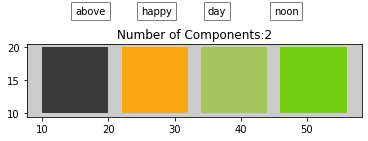

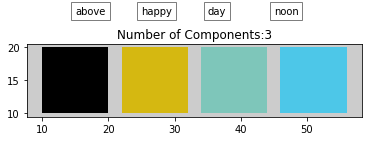

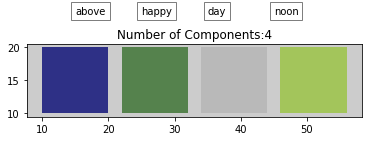

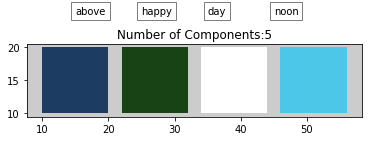

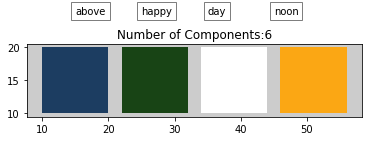

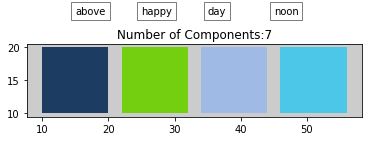

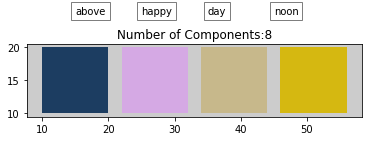

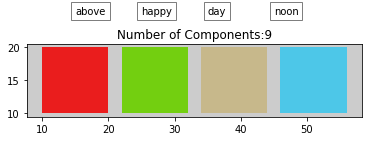

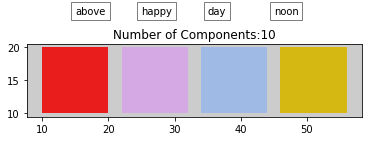

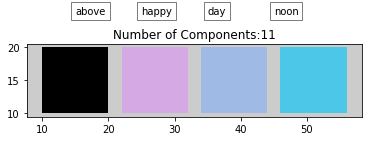

In [398]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 150em; }</style>"))


for i in range(2,12):
    rmat = rmat = pd.read_csv('ratings_matrix_{}PC.csv'.format(i)).drop(rmat.columns[[1]], axis=1).rename(columns={'Unnamed: 0':'concept'})
    
    display_ai(d = rmat, concepts=cluster_3, method='balanced',title='Number of Components:{}'.format(i))

/Users/kushin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


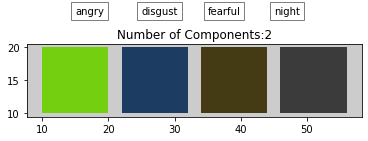

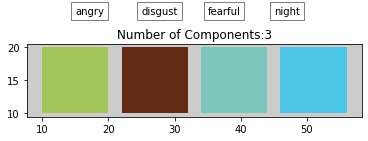

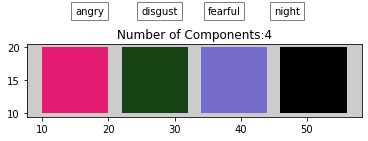

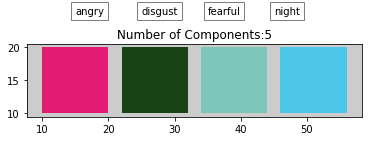

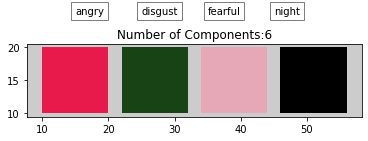

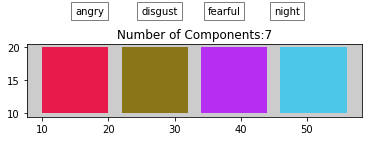

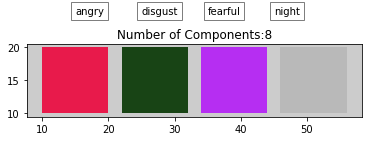

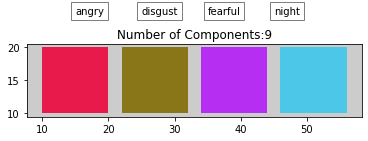

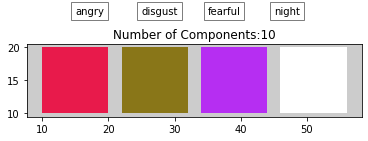

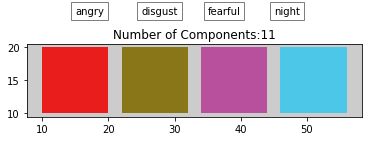

In [399]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 150em; }</style>"))


for i in range(2,12):
    rmat = rmat = pd.read_csv('ratings_matrix_{}PC.csv'.format(i)).drop(rmat.columns[[1]], axis=1).rename(columns={'Unnamed: 0':'concept'})
    
    display_ai(d = rmat, concepts=cluster_4, method='balanced',title='Number of Components:{}'.format(i))

In [424]:
ratings_matrix

array([[0.41804313, 0.59197912, 0.54743605, ..., 0.18741856, 0.52653383,
        0.27805808],
       [0.30303586, 0.79600735, 0.52756758, ..., 0.13452786, 0.14516991,
        0.13328836],
       [0.37849903, 0.63261282, 0.50552848, ..., 0.02095262, 0.13615945,
        0.13641597],
       ...,
       [0.2959401 , 1.        , 0.72160891, ..., 0.29888918, 0.55739244,
        0.31310193],
       [0.17305389, 0.65986625, 0.43474434, ..., 0.06181435, 0.16460326,
        0.16824074],
       [0.98406562, 0.39203866, 0.4578556 , ..., 0.87223161, 0.87072631,
        0.94852321]])

In [427]:
8*3*16

384